<a href="https://colab.research.google.com/github/harikrishna0007/Hari_Data690/blob/main/homework_1(602).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question-1

# MAE Cost Function

###**(a)** The essential similarity among the Mean Absolute Error (MAE) for the cost function J(ω) and J’(ω) having the developed Mean Square Error (MSE). The J(ω) function essentially depicts the process of calculating the average distance between the predicted and real data without highlighting the errors. On the other hand, J’(ω) function calculates the average squared difference between the actual and predicted values for the concerned cost function. In addition to this, the similarity between the two cost functions is that both factors provide a brief idea about the regression formulation.

###**(b)** J(ω) cost function can be utilized only when there are fewer outliers in the entire data whereas the J’(ω) function can be implemented upon data consisting of a high number of outliers.


#Question-2

## Collinearity

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#Question-3

##Occam’s Razor 

##Occam’s razor is essentially a philosophical idea that can be applied as an application of a machine learning procedure. The idea behind the utilization of such philosophies is that it suggests the use of simple ML models over models that are more complicated. In addition, this philosophy also states that there is a significant relationship between Occam’s Razor and notions of bias with respect to ML such that so that necessary attributes can be utilized for ML implementation. 

#Question-4

# Regression Analysis

### Loading the dataset

In [64]:
dt = pd.read_csv('/content/GateArrivalDelay.csv')

### Overviewing data

In [65]:
dt

,Date_Time,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,AverageGateArrivalDelay
0,2019-03-01 00:00:00,90.00,7.70,9.47,0.60,13.67,6.67,4.70
1,2019-03-02 00:00:00,72.73,0.91,2.55,0.00,13.17,5.33,14.73
2,2019-03-03 00:00:00,75.00,1.00,0.91,0.00,25.50,14.00,11.38
3,2019-03-04 00:00:00,83.33,1.50,1.13,3.00,26.75,17.50,7.08
4,2019-03-05 00:00:00,90.91,0.64,1.38,1.27,15.00,12.50,4.09
...,...,...,...,...,...,...,...,...
2202,2019-05-27 23:00:00,47.62,16.29,20.23,1.81,32.00,30.75,23.24
2203,2019-05-28 23:00:00,47.06,10.29,8.49,3.00,71.17,64.67,25.71
2204,2019-05-29 23:00:00,68.18,4.59,2.64,2.18,11.83,9.17,17.09
2205,2019-05-30 23:00:00,59.09,2.55,3.04,2.14,25.75,23.00,15.00


### Performing EDA

In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date_Time                     2207 non-null   object 
 1   % On-TimeGateArrivals         2207 non-null   float64
 2   AverageBlockDelay             2207 non-null   float64
 3   AverageTaxiInDelay            2207 non-null   float64
 4   AverageAirborneDelay          2207 non-null   float64
 5   AverageAirportDepartureDelay  2207 non-null   float64
 6   AverageGateDepartureDelay     2207 non-null   float64
 7   AverageGateArrivalDelay       2207 non-null   float64
dtypes: float64(7), object(1)
memory usage: 138.1+ KB


### Checking Null values

In [66]:
dt.isnull().sum()

Date_Time                       0
% On-TimeGateArrivals           0
AverageBlockDelay               0
AverageTaxiInDelay              0
AverageAirborneDelay            0
AverageAirportDepartureDelay    0
AverageGateDepartureDelay       0
AverageGateArrivalDelay         0
dtype: int64

In [67]:
dt.describe()

,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,AverageGateArrivalDelay
count,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,80.334214,3.797975,6.247077,2.698981,16.221010,9.568822,9.517286
std,24.149181,7.109793,3.871284,5.597806,15.432223,12.203389,16.488662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.710000,1.160000,3.495000,0.920000,8.135000,3.390000,2.965000
50%,88.570000,2.360000,6.100000,1.810000,12.600000,6.460000,5.470000
75%,93.635000,4.005000,8.580000,3.000000,18.755000,10.755000,9.470000
max,100.000000,163.420000,36.110000,140.030000,144.750000,114.060000,236.740000


### **(A)**Implementing correlation analysis

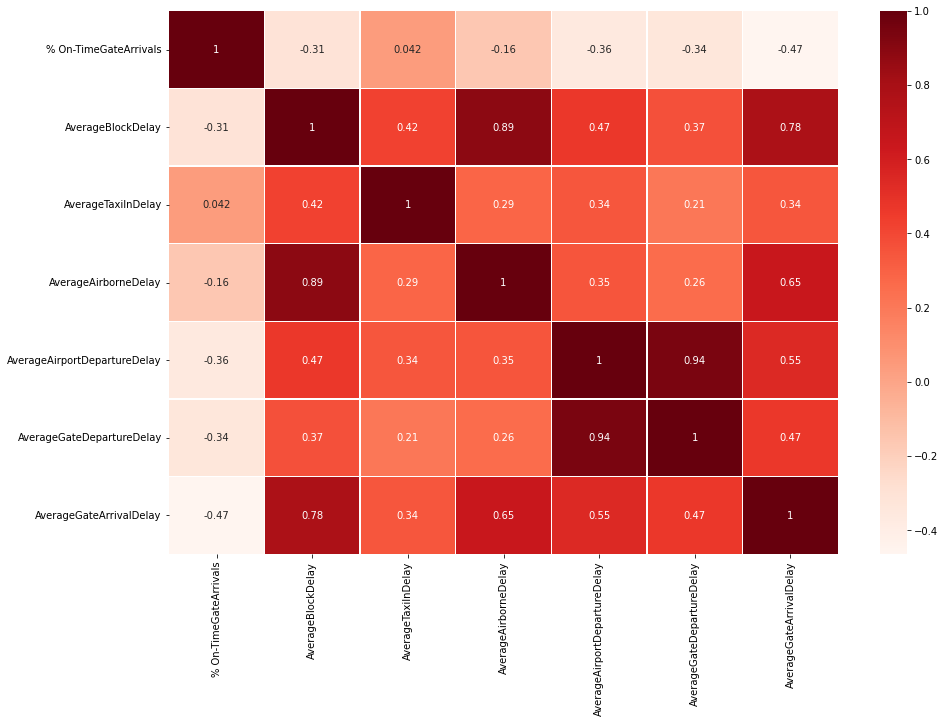

In [68]:
plt.figure(figsize=(15, 10))
sns.heatmap(dt.corr(), linewidths=.5, cmap = 'Reds', annot = True)

### Selection of features

In [69]:
X2 = dt[["AverageBlockDelay"]]
y2 = dt[["AverageGateArrivalDelay"]]

#### **(B)** Splitting of data

- splitting data while taking the test size as 0.3. 

In [70]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=41)

###Developing model

In [72]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X2, y2, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

#### Model Pipelining and Standard Scaler

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scalar', StandardScaler())])
X2_train = pipeline.fit_transform(X2_train)
X2_test = pipeline.transform(X2_test)

#### **(C)** Implementing Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X2_train,y2_train)

LinearRegression(normalize=True)

#### Predicting results

In [75]:
pred2 = lin_reg.predict(X2_test)

### Analysis

- Although one considers linear regression to be a simple model, it frequently results in a high bias, low variance ML model. 

- It indicates that because it is straightforward, it typically generalizes well but can occasionally perform worse in some extreme circumstances.

- Therefore, simpler models are High Bias, Low Variance models, which is the answer.

#### **(D)** Obtaining Results

In [77]:
test_pred2 = lin_reg.predict(X2_test)
train_pred2 = lin_reg.predict(X2_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y2_test, test_pred2)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y2_train, train_pred2)

results_df2 = pd.DataFrame(data=[["Linear Regression with LSTAT and other correlated features", *evaluate(y2_test, test_pred2) , cross_val(LinearRegression())]],columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 5.078498780779803
MSE: 90.2578598167164
RMSE: 9.500413665557748
R2 Square 0.5264877149909877
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.212072553742542
MSE: 112.17723779647164
RMSE: 10.591375632866187
R2 Square 0.6341139015687463
__________________________________


## E

- The key word here is "often"; the way that logistic regressions are constructed, particularly when compared to other sorts of models, is much more likely to favor specific forms of errors; in this case, bias-type errors are more likely to be produced than variance-type errors.

- Another way to look at it is that most linear models will give you generally accurate predictions overall rather than extremely accurate or wrong ones. 

- Obviously, that is a very simplistic interpretation, but here have discovered a method that feels natural. 

-  In essence, linear models will make more general predictions rather than capturing every variation in the data due to the way they are built.

In [82]:
dat = dt[["AverageBlockDelay", "AverageGateArrivalDelay"]]
dat

,AverageBlockDelay,AverageGateArrivalDelay
0,7.70,4.70
1,0.91,14.73
2,1.00,11.38
3,1.50,7.08
4,0.64,4.09
...,...,...
2202,16.29,23.24
2203,10.29,25.71
2204,4.59,17.09
2205,2.55,15.00


### quadratic regression analysis

- A statistical technique called quadratic regression is employed to identify the parabola solution that best fits a given set of information. Finding the equations of the straight line which most closely fits a data set is the goal of this sort of regression, which is an expansion of simple linear regression. 

-  Finding the equations of the parabola which best fits a collection of data is the procedure of a quadratic regression. As a result, users get at the equation y=ax2+bx+c where a0. The least squares method is the most efficient way to manually find this equation.

-  In situations where the second differences are constant, a quadratic model is adequate. We can ascertain the degree of the model for the data by identifying variations between the dependent values. 

- The model will be quadratic if the second difference has the same value as the first. It is also possible to employ quadratic functions as models. 

-  For instance, the area of a rectangular block of land bounded on three sides by a 100-foot fence could be represented by the function A (x) = 50 x x 2 2. This model could be used to determine the land plot's largest feasible area.

In [83]:
dat['quad'] = dat.apply(lambda row: row.AverageGateArrivalDelay**2, axis =1 )
dat

,AverageBlockDelay,AverageGateArrivalDelay,quad
0,7.70,4.70,22.0900
1,0.91,14.73,216.9729
2,1.00,11.38,129.5044
3,1.50,7.08,50.1264
4,0.64,4.09,16.7281
...,...,...,...
2202,16.29,23.24,540.0976
2203,10.29,25.71,661.0041
2204,4.59,17.09,292.0681
2205,2.55,15.00,225.0000


In [84]:
X_q = dat.iloc[:,dat.columns != 'AverageBlockDelay']
Y_q = dat.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)

In [85]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [86]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  3.552713678800501e-15
                          Coefficient
AverageGateArrivalDelay  1.000000e+00
quad                     1.798474e-18


In [87]:
y_pred_q_q = model.predict(X_test)

In [88]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
1813,5.37,5.37
1888,8.90,8.90
1736,6.53,6.53
438,6.43,6.43
1792,14.16,14.16


In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 2.8455901536563984e-15
Mean Squared Error: 2.309250406496436e-29
Root Mean Squared Error: 4.805466061160391e-15
R^2 Score :           1.0


# Question - 5

### Regularization Methods

# f(x) = sin2 x + 2 cos x